In [108]:
%load_ext autoreload
%autoreload 2
%aimport models

import models
from models import DEN

import data_processors.utils
from data_processors.data_ops import Alphabet


import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
predictor_model = 'RNNClassifier'
saved_predictor = 'saved_ml_data/saved_models/rnn_classifier_1'
rnn_model = models.model_catalog[predictor_model].load(saved_predictor)

In [8]:
WILDTYPE = "MAADGYLPDWLEDNLSEGIREWWALKPGAPQPKANQQHQDNARGLVLPGYKYLGPGNGLDKGEPVNAADAAALEHDKAYDQQLKAGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQAKKRLLEPLGLVEEAAKTAPGKKRPVEQSPQEPDSSAGIGKSGAQPAKKRLNFGQTGDTESVPDPQPIGEPPAAPSGVGSLTMASGGGAPVADNNEGADGVGSSSGNWHCDSQWLGDRVITTSTRTWALPTYNNHLYKQISNSTSGGSSNDNAYFGYSTPWGYFDFNRFHCHFSPRDWQRLINNNWGFRPKRLNFKLFNIQVKEVTDNNGVKTIANNLTSTVQVFTDSDYQLPYVLGSAHEGCLPPFPADVFMIPQYGYLTLNDGSQAVGRSSFYCLEYFPSQMLRTGNNFQFSYEFENVPFHSSYAHSQSLDRLMNPLIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMAVQGRNYIPGPSYRQQRVSTTVTQNNNSEFAWPGASSWALNGRNSLMNPGPAMASHKEGEDRFFPLSGSLIFGKQGTGRDNVDADKVMITNEEEIKTTNPVATESYGQVATNHQSAQAQAQTGWVQNQGILPGMVWQDRDVYLQGPIWAKIPHTDGNFHPSPLMGGFGMKHPPPQILIKNTPVPADPPTAFNKDKLNSFITQYSTGQVSVEIEWELQKENSKRWNPEIQYTSNYYKSNNVEFAVNTEGVYSEPRPIGTRYLTRNL"
WILDTYPE_2 = WILDTYPE[430:430+54]

In [248]:
den = DEN.DEN(seq_length=len(WILDTYPE),
              tile_scheme={2:(438, 472)},
              batch_size=10, latent_size=2, intermediate_size=250, dropout=0.01,
              predictor=rnn_model.predict,
              wt=WILDTYPE,
              k=10,
              opts={"lr": 0.0001,
                    "weights": [-2, 0, 0, 1]}
             )
#438:472 is the L7 hackathon tile

In [399]:
hist = []
den.train()
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(6000):
        den.learn(2)
        running_loss += den.last_loss
        hist.append([i.item() for i in den.loss_terms])
        if i % 2000 == 1999:    # print every 2000 mini-batches
            id = str(epoch+1)+"-"+str(i+1)+"-"+"den.pth"
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            PATH = './'+id
            torch.save(den.state_dict(), PATH)
            running_loss = 0.0

[1,  2000] loss: 894.671
[1,  4000] loss: 894.574


KeyboardInterrupt: 

In [391]:
den.weights = [-2, 0, 0, 1]

In [309]:
den.predictor = splice_n_pred

In [310]:
den.i

3617

In [362]:
den.loss_terms

[tensor([-80812.3438], grad_fn=<DivBackward0>),
 tensor([-258348.4062], grad_fn=<DivBackward0>),
 tensor([-0.0518], grad_fn=<DivBackward0>),
 tensor([0.0930], grad_fn=<DivBackward0>)]

In [31]:
den.getLoss(2)

tensor([1.6700], grad_fn=<AddBackward0>)

In [75]:
den.generate(2)

['EPWVVYMAPMHDVQA-AMMHFSEPKFGVDDDKLV',
 'NYSMCCHPFRYHPKARLSRMFTQEWVDMF-FV-G',
 'LNRFFKVMSCILPCHKLAKGIKMVHFAFYYSRAE',
 'DSWKQECTCSHVHIGPWCNNPSFTYSIIHEEPAV',
 'ASGTMLRGPQNVMVLEIQPMRPDGR-GKFCNFAI',
 'PGLNPVIGSIISKKFKYKKGHSRVHKNHDDWIDD',
 'NERRRVKECSLPNYHNYWMHDNPHRHIK-HC-IM',
 'NENPMKNELKMQNEK-HMVRNEQ-KDERFNCIKK',
 'W-DRTHKPCVCGCFFVDMTSTQQAMFCHRGLKMI',
 'LWRCMRIEAHPNKCNSRHEFETCKEGEAGLVIDI']

In [358]:
hist0 += hist.copy()

In [44]:
import matplotlib.pyplot as plt

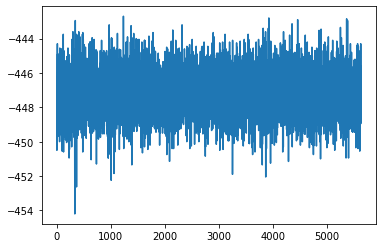

In [400]:
plt.plot([i[0] for i in hist])

In [372]:
import editdistance
editdistance.eval('WITVLLYYLSSLRNGSGQRQQTVEFWVAGPENMQ-',
 'RPDWNTYYLSKTINHSGQNQLTLMDAVAGPSYMQ-')

18

In [395]:
den.loss_terms

[tensor([-447.8500], grad_fn=<DivBackward0>),
 tensor([-44.7500], grad_fn=<DivBackward0>),
 tensor([-0.0493], grad_fn=<DivBackward0>),
 tensor([0.2590], grad_fn=<DivBackward0>)]

In [62]:
den.wt.shape

torch.Size([10, 1, 736, 21])

In [401]:
den.generate(2)

['KQDHPACMVYEFLHMHDRMSETYDSMYRICPKAGV',
 'EHTFHDQRSQPHNDIEYTTNTQLSFIQLHMISL',
 'LDQIAYTFTRLWDVWAHMQFIIRQTPTIDAWYECP',
 'NNAHATFHGKFPIFKQNGAMPIYQQVHGAGGGVFS',
 'QDMSGVFDIRPSQNTHATIVIKIKTSYQAVCQG',
 'AGWLHFASVCAEFKSEGDMVMQFNEWLWKQYIEM',
 'NCQQDPDRFVCEMQLWKVWMHSKPLEPCDRADS',
 'PVRLWSSDMYCKWDLMFEMEVSEDMPHSYEELWG',
 'CKIYPASDVYELYAQDCDGDWMQICERQNGKPM',
 'IGDRYEVERFETLVTRRKWNANQLTVIDLWPFRP']

In [264]:
den.pwm1[0,0,0:5,:]

tensor([[-3.9744, -4.0466,  0.0869, -3.9486, -3.9170, -3.9344, -3.9981, -3.9984,
         -3.8266, -3.9717, -3.9686, -4.0489, -4.0038, -4.0192, -3.9969, -4.0142,
         -3.9097, -3.9142, -3.9911, -3.9679, -3.9820],
        [-4.0064, -3.9440, -4.0613, -3.9640, -3.9772, -3.9692, -3.9578, -3.9863,
         -3.9794, -3.9078, -4.0877, -3.9665,  0.0569, -4.0354, -3.9839, -3.9660,
         -4.0192, -4.0356, -3.9380, -3.9793, -4.0191],
        [-3.9698, -4.0155, -3.9891, -3.9390, -4.0129, -4.0899, -4.0242, -3.9431,
         -4.0186, -3.8615, -4.0060, -4.0204, -3.9836, -3.9068, -3.8619, -3.9405,
         -4.0435,  0.0000,  0.0149, -4.0166, -4.0309],
        [-3.9778, -3.9096, -3.9718, -3.9957, -4.0093, -4.0064, -4.0340,  0.0102,
          0.0000, -3.9108, -3.9593, -3.9705, -3.9801, -3.9019, -3.9361, -4.0268,
         -3.9391, -4.0173, -4.0337, -3.9277, -3.9764],
        [-4.0138, -3.9600, -3.9709, -3.9718, -4.0179, -4.0168, -3.8832, -4.0221,
         -4.0132, -4.0200, -3.8851, -3.8983, -3.994

In [198]:
den.twt[0,0,0:5,:]

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0.]])

In [122]:
den.optimizer = torch.optim.Adam(den.parameters(), lr=0.0001)

In [119]:
den.dropout = torch.nn.Dropout(p=0.2)

In [179]:
start, end = den.tile_scheme[2]
den.seq2string(den.wt[:, :, start:end, :])

['LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA',
 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA']

In [139]:
['LIYTYYYVLSNTFHYSGQNQKTGKFSVAGPKNMD-']

['LWKK-CTYTVGRKNKFGGGFRMCKFIELKSPLMV']

In [254]:
hist0 = []

In [141]:
len(range(438, 472))

34

In [142]:
len(list(range(1000))[438:472])

34

In [143]:
dictt = {1:2, 4:5, 3:3}

In [149]:
sum([i<4 for i in dictt.keys()])

2

In [146]:
[i for i in dictt.keys()]

[1, 4, 3]

In [147]:
4<4

False

In [151]:
a = torch.Tensor(
    [[0.2215, 0.5859, 0.4782, 0.7411],
    [0.3078, 0.3854, 0.3981, 0],
    [0.1363, 0.4060, 0.2030, 0.4940],
    [0.1640, 0.6025, 0.2267, 0.7036],
    [0.2445, 0.3032, 0.3300, 0.4253]])

In [161]:
a, b = torch.zeros([10, 1, 34, 21]), torch.zeros([10, 1, 1, 21])

In [165]:
torch.cat((a,b),dim=2).shape

torch.Size([10, 1, 35, 21])

In [200]:
den.wtdelta.float()

tensor([[6.6986e-03, 5.8516e-03, 4.8746e-02,  ..., 1.4737e-03, 4.9876e-03,
         4.1394e-02],
        [1.2763e-02, 4.4494e-03, 2.0240e-02,  ..., 3.8448e-03, 3.9101e-03,
         1.9369e-02],
        [4.2602e-03, 6.7740e-03, 1.5193e-02,  ..., 2.9624e-05, 4.0039e-03,
         2.4102e-02],
        ...,
        [0.0000e+00, 1.6585e-03, 2.6671e-02,  ..., 3.8034e-03, 2.0336e-03,
         2.8774e-02],
        [1.2352e-03, 3.1670e-03, 1.7244e-02,  ..., 2.6959e-03, 1.5436e-03,
         2.0604e-02],
        [3.8105e-03, 6.2417e-03, 1.0000e+00,  ..., 8.8455e-03, 1.0591e-03,
         4.9705e-02]], grad_fn=<L1LossBackward>)

In [209]:
torch.max(den.pwm1,dim=3)[0][0]

tensor([[1.0228, 1.0315, 1.0253, 1.0145, 1.0249, 1.0095, 1.0121, 1.0069, 1.0149,
         1.0170, 1.0180, 1.0066, 1.0196, 1.0240, 1.0251, 1.0066, 1.0266, 1.0162,
         1.0092, 1.0163, 1.0242, 1.0136, 1.0139, 1.0119, 1.0172, 0.0079, 1.0064,
         1.0151, 1.0026, 1.0268, 1.0211, 1.0218, 1.0242, 1.0016, 1.0110]],
       grad_fn=<SelectBackward>)

In [239]:
import torch.nn.functional as F
logits = torch.tensor([[-30,-30,1]])
logits[0][0] = -42.0
logits

tensor([[-42, -30,   1]])

In [238]:
for i in range(500):
    print(F.gumbel_softmax(logits, tau=0.2, hard=True))

RuntimeError: "exponential_cpu" not implemented for 'Long'

In [266]:
HIST0 = (hist0+hist).copy()

In [270]:
den.predictor([den.str2ind(WILDTYPE_2)]*2)[0]

0.949479877948761

In [276]:
WILDTYPE_2

'SLDRLMNPLIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMAVQGRNYIPGPSY'

In [279]:
WILDTYPE_2.index('LIDQ')

8

In [278]:
WILDTYPE_2.index('VQ')

42

In [286]:
def splice_n_pred(seq):
    INP = WILDTYPE_2[:8] + seq + WILDTYPE_2[42:]
    inds = data_processors.utils.seq_to_ind(INP.replace('-', ''), Alphabet().chars) 
    return rnn_model.predict([inds]*2)[0]



In [375]:
WTL7T1 = 'LIDQYLYYLSKTINGSGQNQQTLKFSVAGPSNMA'

In [288]:
TESTERS = ['WITVLLYYLSSLRNGSGQRQQTVEFWVAGPENMQ-',
 'RPDWNTYYLSKTINHSGQNQLTLMDAVAGPSYMQ-',
 'LIDEYLYDWPKN-PGGPQNQQTHKDSVAVGHNGA-',
 'LGDQYLYYLSEQINGSGQHQQHLSFSVAGPSNQQC',
 'LIDDYLYWLSKQGNGAYQCQVKEWFSVIF-SNMA-',
 'LPEQYHYCLNKTINGSGQNQHTNKFSVDEMSNRA-',
 'KNDLYLENLFKSELGSTMNQHTLKYSLAGSSNFQK',
 'LFDQYLY-LSRTINGYGPNQDTQRFSSAVPSNMA-',
 'LDDQYWYYVSKTINGSGQ-QQTLKCSHAGPSNMAH',
 'LIYTYYYVLSNTFHYSGQNQKTGKFSVAGPKNMD-']

In [408]:
rets = []
while True:
    x = den.generate(2)
    u = [(s,splice_n_pred(s)) for s in x]
    for s,ss in u:
        d = editdistance.eval(s, WTL7T1)
        if ss>.75 and d>10:
            print(s, ss, editdistance.eval(s, WTL7T1))
            rets.append(s)

LICQYLYNLSKTICGAAQARNSLKFSCAGPSNMQ 0.9348356127738953 11


KeyboardInterrupt: 

In [297]:
any(i > .9 for i in u)

False

In [397]:
hist[-1]

[-446.25, -38.75, -0.04915418103337288, 0.15000002086162567]

In [ ]:
rets

In [304]:
torch.save(den.state_dict(), './saved_ml_data/saved_models/den_1/checkpoint0.pth')

In [322]:
for s in rets:
    print(s, splice_n_pred(s))

L 0.844513475894928
I 0.7997623682022095
D 0.5972391366958618
Q 0.9403858780860901
Y 0.5491309762001038
L 0.844513475894928
Y 0.5491309762001038
Y 0.5491309762001038
L 0.844513475894928
L 0.844513475894928
K 0.773987889289856
T 0.7963484525680542
I 0.7997623682022095
K 0.773987889289856
K 0.773987889289856
S 0.8647920489311218
G 0.6835780739784241
Q 0.9403858780860901
N 0.8822843432426453
Q 0.9403858780860901
Q 0.9403858780860901
T 0.7963484525680542
L 0.844513475894928
K 0.773987889289856
F 0.7452043890953064
S 0.8647920489311218
V 0.831758439540863
A 0.8554148077964783
G 0.6835780739784241
P 0.13825160264968872
S 0.8647920489311218
T 0.7963484525680542
M 0.8889304995536804
L 0.844513475894928
I 0.7997623682022095
D 0.5972391366958618
Q 0.9403858780860901
Y 0.5491309762001038
L 0.844513475894928
Y 0.5491309762001038
Y 0.5491309762001038
A 0.8554148077964783
S 0.8647920489311218
K 0.773987889289856
T 0.7963484525680542
I 0.7997623682022095
S 0.8647920489311218
G 0.6835780739784241
G 0.

In [323]:
rets

['L',
 'I',
 'D',
 'Q',
 'Y',
 'L',
 'Y',
 'Y',
 'L',
 'L',
 'K',
 'T',
 'I',
 'K',
 'K',
 'S',
 'G',
 'Q',
 'N',
 'Q',
 'Q',
 'T',
 'L',
 'K',
 'F',
 'S',
 'V',
 'A',
 'G',
 'P',
 'S',
 'T',
 'M',
 'L',
 'I',
 'D',
 'Q',
 'Y',
 'L',
 'Y',
 'Y',
 'A',
 'S',
 'K',
 'T',
 'I',
 'S',
 'G',
 'G',
 'G',
 'Q',
 'R',
 'Q',
 'Q',
 'T',
 'Q',
 'F',
 'S',
 'C',
 'A',
 'G',
 'P',
 'S',
 'C',
 'M',
 'A',
 'F',
 'L',
 'I',
 'D',
 'Q',
 'Y',
 'L',
 'Y',
 'Y',
 'L',
 'S',
 'K',
 'T',
 'D',
 'N',
 'G',
 'M',
 'G',
 'Q',
 'N',
 'Q',
 'Q',
 'T',
 'L',
 'K',
 'F',
 'S',
 'V',
 'A',
 'G',
 'P',
 'S',
 'N',
 'M',
 'L',
 'L',
 'I',
 'D',
 'Q',
 'Y',
 'L',
 'Y',
 'Y',
 'L',
 'S',
 'K',
 'T',
 'I',
 'N',
 'P',
 'S',
 'L',
 'Q',
 'L',
 'Q',
 'Q',
 'P',
 'L',
 'K',
 'F',
 'S',
 'V',
 'A',
 'G',
 'P',
 'S',
 'N',
 'M',
 'A',
 'L',
 'I',
 'Q',
 'Y',
 'L',
 'Y',
 'Y',
 'L',
 'S',
 'K',
 'T',
 'F',
 'K',
 'R',
 'G',
 'Q',
 'N',
 'R',
 'Q',
 'T',
 'K',
 'F',
 'S',
 'V',
 'C',
 'G',
 'P',
 'H',
 'R',
 'M',
 'A',
 'L'

Text(0.5, 0, 'Data')

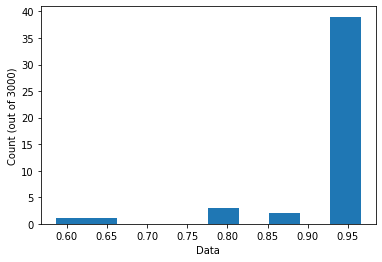

In [368]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = []
den.eval()
for i in range(300):
    x += [splice_n_pred(u) for u in den.generate(2)]
    x = [i for i in x if i > 0.5]
plt.hist(x)  # `density=False` would make counts
plt.ylabel('Count (out of 3000)')
plt.xlabel('Data')


In [370]:
print(len(x))

46


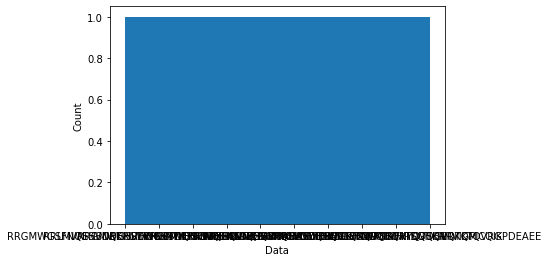

Text(0.5, 0, 'Data')

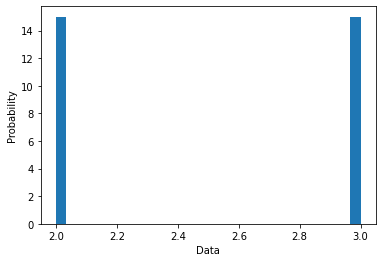

In [331]:
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

In [398]:
den.generate(2)

['CAYICNCSWADKALLFHTNNQCADVVPWRMK',
 'VSNDAAHMVRVESKTYFLSRCYMKDGCWQVCQRL',
 'EIMRLYNTWITSHWELLYQPVDYIITCANAFC',
 'WLLHMVRAQYFDWKHKALPGRCEHQKARYI',
 'KAPHAQEIIWFRKQFPSYWSGAFHLCNRCFF',
 'RLGVRHNIHWWSVAYYQADSTVAWCYQHYTW',
 'TSQERLERAPVVNQAGGNHWMYVYQARDLLALQN',
 'PQRMRSPYQAKMHQWIKCYKHRETKALVQYLLID',
 'TNNFSIQKNWVTKNVYPMMCGHIVFIVYIAAK',
 'EINHDPQWLCYWATQLTWEFQMDQVTHRMWDSPI']

In [411]:
import smart_open
import pandas as pd
with open('variants.csv') as fin:
        with smart_open.open('s3://pandoras-bucket/data/L7_hackathon/generators/generated_variants/tiwa_variants_0', 'w') as fout:
            for line in fin:
                fout.write(line)

Seq,edit_dist,priority,mut_start,mut_end_wt,oracle_used,explorer_generator,score_<oracle_name>,score_<another_oracle>

LICQYLYNLSKTICGAAQARNSLKFSCAGPSNMQ,11,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.934835613,

LIDQYLYYLTTTNFEGQNAHTVKFSVAGDRNMA,10,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.945567012,

LADQYLYNLHKTIFGVGYNRSSLKFSVAGSNMA,10,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.89563781,

LTQYLYHLKTIYGSQQNATQKFSVAGPSKMA,10,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.805679917,

LIDQYLYYLSRTIIWWKNTQTLKFSIAGPSHMAC,10,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.79045397,

LICQYLYYLSKTYTGSGNNQPPLMFSQSGPSNYA,10,1,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.76862973,

LIDQYLYYLSMSDGGSGQSAQTLMFSVAGGKMA,10,1,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.760783315,

LIDQYLYYLSKTGPGSRSNQNSLKFSVQNISNMA,9,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.957843542,

LIDQYLYYLIKTIGQVQNLQTLKFSIGGRTNMA,9,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.947821915,

LIDQYLYYLSKTVGGSGDNDQHLAFSAGPKVMA,9,2,438,472,RNN_pack_0,DEN_RNN_pack_0_0,0.9285374

In [402]:
den.load_state_dict(torch.load('./saved_ml_data/saved_models/den_1/checkpoint0.pth'))


<All keys matched successfully>

In [403]:
den.generate(2)

['LIDQWMYYLWKDINGIGTGQQTLPFCVAGPSNMA',
 'WIDPYQYWQEKTTNGSGQNQQTLKFSKAGPGNMAM',
 'HIFNYLYYLGKTKNGSGQNQAFHRDSARPSNMF',
 'LIDQLYYLSKTINVSGQNWQQLKFSTAQWSKML',
 'TMDQYLKPSKTINRSGNNQQTKKDFDDGPSNMAG',
 'LIDQYYYYLDRQIGGSGQNQQRHWMSVAGPSNFA',
 'LIQYNSDMSDTIVGLGKNPQTLKCSVAMTKNMA',
 'LIDQYLYYLQKCINMSGQNQQTLGFVCIPENA',
 'LIDCYNYSSKTIPGVGENQQAKFSVAMPSNMD',
 'LIDQYLFYLSKTINGMNQNYQTLKFSVAGPVNMAE']

In [ ]:
den.loss_terms

In [412]:
den.i

48872